LinearRegression
-1552451270884.8357 +/- 2827061383720.0933
Lasso
-3.164662072634863 +/- 0.31234047751511607
Ridge
-1.4419122283623516 +/- 0.2993927742734512
ElasticNet
-3.149509255189643 +/- 0.324352860482773
RandomForestRegressor
-0.7520737777777778 +/- 0.18954470654064778
GradientBoostingRegressor
-0.796649543362728 +/- 0.20014767561850388
SVR
-1.6651072293246891 +/- 0.4523128054563109
LinearRegressor
Best Score: -1654338083054.9165 +/- 1761701483270.1504
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}


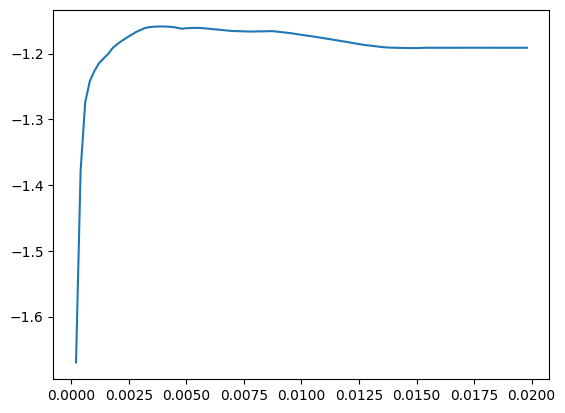

Lasso
Best Score: -1.1586384578672377 +/- 0.2249813494747526
Best Parameters: {'alpha': 0.0038, 'copy_X': True, 'fit_intercept': True, 'normalize': False}
Ridge
Best Score: -1.4418246054142094 +/- 0.29985847480254824
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False, 'solver': 'sparse_cg'}


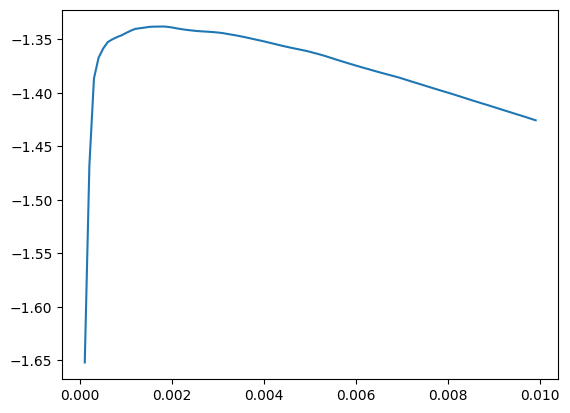

ElasticNet
Best Score: -1.2824781113306083 +/- 0.14155209218524906
Best Parameters: {'alpha': 0.0018, 'copy_X': True, 'fit_intercept': True, 'normalize': True}
RandomForestRegressor
Best Score: -0.7241054580850286 +/- 0.1968257934393228
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 385}


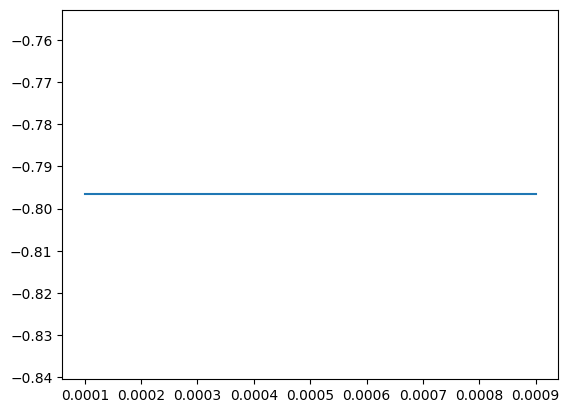

GradientBoostingRegressor
Best Score: -0.7061602346829554 +/- 0.17079345275232924
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}
SVR
Best Score: -0.7569966155308583 +/- 0.1918752500173961
Best Parameters: {'C': 24, 'coef0': 0.9, 'gamma': 'scale', 'kernel': 'poly'}
>lm -1654338083054.917 +/- 1761701483270.150
>lm_l -3.165 +/- 0.312
>rid -1.442 +/- 0.299
>enr -3.150 +/- 0.324
>rf -0.752 +/- 0.190
>gbr -0.797 +/- 0.200
>svr -1.665 +/- 0.452
>stacking -0.865 +/- 0.231
>lm_l -1.159 +/- 0.225
>rid -1.447 +/- 0.295
>rf -0.724 +/- 0.197
>gbr -0.706 +/- 0.171
>svr -0.757 +/- 0.192
>stacking -0.615 +/- 0.096
>lm -1654338083054.917 +/- 1761701483270.150
>lm_l -3.165 +/- 0.312
>rid -1.442 +/- 0.299
>enr -3.150 +/- 0.324
>rf -0.752 +/- 0.190
>gbr -0.797 +/- 0.200
>svr -1.665 +/- 0.452
>voting -236334011866.074 +/- 251671640467.004
>rf -0.724 +/- 0.197
>gbr -0.706 +/- 0.171
>svr -0.757 +/- 0.192
>voti

In [3]:
#####import libraries and data

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#supress warnings
import warnings
warnings.filterwarnings("ignore")

#import data
X = pd.read_csv('data/preprocessed/X.csv')
X_train = pd.read_csv('data/preprocessed/X_train.csv')
X_test = pd.read_csv('data/preprocessed/X_test.csv')
y_train = pd.read_csv('data/preprocessed/y_train.csv')
y_test = pd.read_csv('data/preprocessed/y_test.csv')

#import ML packages
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


#LinearRegression mean cross-validation
lm = LinearRegression()
lm.fit(X_train, y_train)
cv = cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('LinearRegression')
print(mean(cv), '+/-', std(cv))

#Lasso mean cross-validation
lm_l = Lasso(random_state = 1)
cv = cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('Lasso')
print(mean(cv), '+/-', std(cv))

#Ridge mean cross-validation
rid = Ridge(random_state = 1)
cv = cross_val_score(rid,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('Ridge')
print(mean(cv), '+/-', std(cv))

#ElasticNet mean cross-validation
enr = ElasticNet(random_state = 1)
cv = cross_val_score(enr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('ElasticNet')
print(mean(cv), '+/-', std(cv))

#RandomForestRegressor mean cross-validation
rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('RandomForestRegressor')
print(mean(cv), '+/-', std(cv))

#GradientBoostingRegressor mean cross-validation
gbr = GradientBoostingRegressor(random_state = 1)
cv = cross_val_score(gbr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('GradientBoostingRegressor')
print(mean(cv), '+/-', std(cv))

#SVR mean cross-validation
svr = SVR()
cv = cross_val_score(svr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)
print('SVR')
print(mean(cv), '+/-', std(cv))

###tuning model performance

#ml algorithm tuner
from sklearn.model_selection import GridSearchCV 

#performance reporting function
def clf_performance(regressor, model_name):
    print(model_name)
    print('Best Score: {} +/- {}'.format(str(regressor.best_score_),str(regressor.cv_results_['std_test_score'][regressor.best_index_])))
    print('Best Parameters: ' + str(regressor.best_params_))
    
    
#LinearRegression GridSearchCV
lm = LinearRegression()
param_grid = {
                'fit_intercept':[True,False],
                'normalize':[True,False],
                'copy_X':[True, False]
}
clf_lm = GridSearchCV(lm, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_lm = clf_lm.fit(X_train,y_train)
clf_performance(best_clf_lm,'LinearRegressor')

#determine optimal lasso alpha value
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/5000)
    lm_l = Lasso(random_state = 1,alpha=(i/5000))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)))
    
plt.plot(alpha,error)

plt.show()

#print optimal alpha value
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#Lasso GridSearchCV
lm_l = Lasso(random_state = 1)
param_grid = {
                'alpha':[0.0038],
                'fit_intercept':[True,False],
                'normalize':[True, False],
                'copy_X':[True, False]
}
clf_lm_l = GridSearchCV(lm_l, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_lm_l = clf_lm_l.fit(X_train,y_train)
clf_performance(best_clf_lm_l,'Lasso')

#Ridge GridSearchCV
rid = Ridge(random_state = 1)
param_grid = {
                'fit_intercept':[True,False],
                'normalize':[True, False],
                'copy_X':[True, False],
                'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
}
clf_rid = GridSearchCV(rid, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_rid = clf_rid.fit(X_train,y_train)
clf_performance(best_clf_rid,'Ridge')

#determine optimal elasticnet alpha value
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10000)
    enr = ElasticNet(random_state = 1,alpha=(i/10000))
    error.append(np.mean(cross_val_score(enr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)))
    
plt.plot(alpha,error)

plt.show()

#print optimal alpha value
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#ElasticNet GridSearchCV
enr = ElasticNet(random_state = 1)
param_grid = {
                'alpha':[0.0018],
                'fit_intercept':[True,False],
                'normalize':[True, False],
                'copy_X':[True, False],
}
clf_enr = GridSearchCV(enr, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_enr = clf_enr.fit(X_train,y_train)
clf_performance(best_clf_enr,'ElasticNet')

#RanddomForestRegressor GridSearchCV
rf = RandomForestRegressor(random_state = 1)
param_grid = {
                'n_estimators': [385] , 
                'bootstrap': [True],
                'max_depth': [9],
                'max_features': ['auto'],
                'min_samples_leaf': [1,],
                'min_samples_split': [2]
              }
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'RandomForestRegressor')

#determine optimal gbr alpha value
alpha = []
error = []

for i in range(1,10):
    alpha.append(i/10000)
    gbr = GradientBoostingRegressor(random_state = 1,alpha=(i/10000))
    error.append(np.mean(cross_val_score(gbr,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)))
    
plt.plot(alpha,error)

plt.show()

#print optimal alpha value
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#GradientBoostingRegressor GridSearchCV
gbr = GradientBoostingRegressor(random_state = 1)
param_grid = {
                'n_estimators': [20], 
                'max_depth': [7],
                'max_features': ['auto'],
                'learning_rate': [0.2],
#                 'alpha': [0.0001],
                'min_samples_leaf': [3],
                'min_samples_split': [2]
              }
clf_gbr = GridSearchCV(gbr, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_gbr = clf_gbr.fit(X_train,y_train)
clf_performance(best_clf_gbr,'GradientBoostingRegressor')

#SVR GridSearchCV
svr = SVR()
param_grid = {
                'kernel' : ['poly'],
                'C' : [24],
                'coef0' : [0.9],
                'gamma' : ['scale','auto']
}
clf_svr = GridSearchCV(svr, param_grid = param_grid, cv = 5, scoring='neg_mean_absolute_error', n_jobs = -1)
best_clf_svr = clf_svr.fit(X_train,y_train)
clf_performance(best_clf_svr,'SVR')

#import ensemble packages and numpy functions
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, AdaBoostRegressor

#StackingRegressor mean cross-validation baseline
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lm', LinearRegression()))
    level0.append(('lm_l', Lasso(random_state = 1)))
    level0.append(('rid', Ridge(random_state = 1)))
    level0.append(('enr', ElasticNet(random_state = 1)))
    level0.append(('rf', RandomForestRegressor(random_state = 1)))
    level0.append(('gbr', GradientBoostingRegressor(random_state = 1)))
    level0.append(('svr', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

def get_models():
    models = dict()
    models['lm'] = LinearRegression()
    models['lm_l'] = Lasso(random_state = 1)
    models['rid'] = Ridge(random_state = 1)
    models['enr'] = ElasticNet(random_state = 1)
    models['rf'] = RandomForestRegressor(random_state = 1)
    models['gbr'] = GradientBoostingRegressor(random_state = 1)
    models['svr'] = SVR()
    models['stacking'] = get_stacking()
    return models

models = get_models()
results, names = list(),list()
for name, model in models.items():
    scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f +/- %.3f' % (name, mean(scores), std(scores)))
    

#StackingRegressor mean cross-validation hyperparameter tuning
def get_stacking():
    # define the base models
    level0 = list()
    #level0.append(('lm', LinearRegression(copy_X= True, fit_intercept= True, normalize= True)))
    level0.append(('lm_l', Lasso(random_state = 1, alpha=0.0038, copy_X=True, fit_intercept=True, normalize=False)))
    level0.append(('rid', Ridge(random_state = 1, copy_X=True, fit_intercept=False, normalize=True, solver='cholesky')))
    #level0.append(('enr', ElasticNet(random_state = 1,alpha=0.0018, copy_X=True,fit_intercept=True, normalize= False)))
    level0.append(('rf', RandomForestRegressor(random_state = 1,bootstrap=True, max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split= 2, n_estimators=385)))
    level0.append(('gbr', GradientBoostingRegressor(random_state = 1,learning_rate= 0.2, max_depth= 7, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 20)))
    level0.append(('svr', SVR(C=24, coef0=0.9, gamma='scale', kernel='poly')))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    stacking_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return stacking_model

def get_models():
    models = dict()
    #models['lm'] = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
    models['lm_l'] = Lasso(random_state = 1, alpha=0.0038, copy_X=True, fit_intercept=True, normalize=False)
    models['rid'] = Ridge(random_state = 1, copy_X=True, fit_intercept=False, normalize=True, solver='cholesky')
    #models['enr'] = ElasticNet(random_state = 1,alpha=0.0018, copy_X=True,fit_intercept=True, normalize= False)
    models['rf'] = RandomForestRegressor(random_state = 1,bootstrap=True, max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split= 2, n_estimators=385)
    models['gbr'] = GradientBoostingRegressor(random_state = 1,learning_rate= 0.2, max_depth= 7, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 20)
    models['svr'] = SVR(C=24, coef0=0.9, gamma='scale', kernel='poly')
    models['stacking'] = get_stacking()
    return models

models = get_models()
results, names = list(),list()
for name, model in models.items():
    scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f +/- %.3f' % (name, mean(scores), std(scores)))


#VotingRegressor mean cross-validation baseline
def get_voting():
    # define the base models
    level0 = list()
    level0.append(('lm', LinearRegression()))
    level0.append(('lm_l', Lasso(random_state = 1)))
    level0.append(('rid', Ridge(random_state = 1)))
    level0.append(('enr', ElasticNet(random_state = 1)))
    level0.append(('rf', RandomForestRegressor(random_state = 1)))
    level0.append(('gbr', GradientBoostingRegressor(random_state = 1)))
    level0.append(('svr', SVR()))
    # define the stacking ensemble
    voting_model = VotingRegressor(estimators=level0)
    return voting_model

def get_models():
    models = dict()
    models['lm'] = LinearRegression()
    models['lm_l'] = Lasso(random_state = 1)
    models['rid'] = Ridge(random_state = 1)
    models['enr'] = ElasticNet(random_state = 1)
    models['rf'] = RandomForestRegressor(random_state = 1)
    models['gbr'] = GradientBoostingRegressor(random_state = 1)
    models['svr'] = SVR()
    models['voting'] = get_voting()
    return models

models = get_models()
results, names = list(),list()
for name, model in models.items():
    scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f +/- %.3f' % (name, mean(scores), std(scores)))
    

#VotingRegressor mean cross-validation hyperparameter tuning
def get_voting():
    # define the base models
    level0 = list()
    #level0.append(('lm', LinearRegression(copy_X= True, fit_intercept= True, normalize= True)))
    #level0.append(('lm_l', Lasso(random_state = 1, alpha=0.0038, copy_X=True, fit_intercept=True, normalize=False)))
    #level0.append(('rid', Ridge(random_state = 1, copy_X=True, fit_intercept=False, normalize=True, solver='cholesky')))
    #level0.append(('enr', ElasticNet(random_state = 1,alpha=0.0018, copy_X=True,fit_intercept=True, normalize= False)))
    level0.append(('rf', RandomForestRegressor(random_state = 1,bootstrap=True, max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split= 2, n_estimators=385)))
    level0.append(('gbr', GradientBoostingRegressor(random_state = 1,learning_rate= 0.2, max_depth= 7, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 20)))
    level0.append(('svr', SVR(C=24, coef0=0.9, gamma='scale', kernel='poly')))
    # define the stacking ensemble
    voting_model = VotingRegressor(estimators=level0)
    return voting_model

def get_models():
    models = dict()
    #models['lm'] = LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
    #models['lm_l'] = Lasso(random_state = 1, alpha=0.0038, copy_X=True, fit_intercept=True, normalize=False)
    #models['rid'] = Ridge(random_state = 1, copy_X=True, fit_intercept=False, normalize=True, solver='cholesky')
    #models['enr'] = ElasticNet(random_state = 1,alpha=0.0018, copy_X=True,fit_intercept=True, normalize= False)
    models['rf'] = RandomForestRegressor(random_state = 1,bootstrap=True, max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split= 2, n_estimators=385)
    models['gbr'] = GradientBoostingRegressor(random_state = 1,learning_rate= 0.2, max_depth= 7, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 20)
    models['svr'] = SVR(C=24, coef0=0.9, gamma='scale', kernel='poly')
    models['voting'] = get_voting()
    return models

models = get_models()
results, names = list(),list()
for name, model in models.items():
    scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f +/- %.3f' % (name, mean(scores), std(scores)))
    
#BaggingRegressor mean cross-validation baseline
bagging_model = BaggingRegressor(
                                     bootstrap=True, #The difference between baggong and pasting
                                     random_state=1,
                                     n_jobs=-1
                                     )

bagging_model.fit(X_train, y_train)

bagging_val_scores = cross_val_score(bagging_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("BaggingRegressor Cross-Validation Score: {:.3F}".format(np.mean(bagging_val_scores)))

#BaggingRegressor mean cross-validation hyperparameter tuning
bagging_model = BaggingRegressor(
#                                     base_estimator=RandomForestRegressor(),
                                     bootstrap=True, #The difference between baggong and pasting
                                     random_state=1,
                                     n_estimators=20,
                                     n_jobs=-1
                                     )

bagging_model.fit(X_train, y_train)

bagging_val_scores = cross_val_score(bagging_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("BaggingRegressor Cross-Validation Score: {:.3F}".format(np.mean(bagging_val_scores)))

#BaggingRegressor (pasting) mean cross-validation baseline
pasting_model = BaggingRegressor(
                                     bootstrap=False, #The difference between baggong and pasting
                                     random_state=1,
                                     n_jobs=-1
                                     )

pasting_model.fit(X_train, y_train)

pasting_val_scores = cross_val_score(pasting_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("BaggingRegressor (Pasting) Cross-Validation Score: {:.3F}".format(np.mean(pasting_val_scores)))

#BaggingRegressor (pasting) mean cross-validation hyperparameter tuning
pasting_model = BaggingRegressor(
                                     base_estimator=RandomForestRegressor(),
                                     bootstrap=False, #The difference between baggong and pasting
                                     random_state=1,
                                     n_estimators=40,
                                     n_jobs=-1
                                     )

pasting_model.fit(X_train, y_train)

pasting_val_scores = cross_val_score(pasting_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("BaggingRegressor (Pasting) Cross-Validation Score: {:.3F}".format(np.mean(pasting_val_scores)))

#AdaBoostRegressor mean cross-validation baseline
adaboost_model = AdaBoostRegressor(
                                       random_state=1)

adaboost_model.fit(X_train , y_train)

adaboost_val_scores = cross_val_score(adaboost_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("Adaboost Regressor Cross validation Score: {:.3F}".format(np.mean(adaboost_val_scores)))

#AdaBoostRegressor mean cross-validation hyperparameter tuning
adaboost_model = AdaBoostRegressor(
                                       base_estimator=RandomForestRegressor(),
                                       learning_rate=0.01,
                                       random_state=1)

adaboost_model.fit(X_train , y_train)

adaboost_val_scores = cross_val_score(adaboost_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
print("Adaboost Regressor Cross validation Score: {:.3F}".format(np.mean(adaboost_val_scores)))




##### MSE, RMSE, R-squared for best models (test set)

#import metrics packages
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#VotingRegressor metrics
voting_model = get_voting()
voting_model.fit(X_train,y_train)
tpred_voting=voting_model.predict(X_test)
print('VotingRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_voting)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_voting))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_voting)))
print('R-squared: {}'.format(r2_score(y_test,tpred_voting)))

#StackingRegressor metrics
stacking_model = get_stacking()
stacking_model.fit(X_train,y_train)
tpred_stack=stacking_model.predict(X_test)
print('StackingRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_stack)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_stack))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_stack)))
print('R-squared: {}'.format(r2_score(y_test,tpred_stack)))

#BaggingRegressor (pasting) metrics
pasting_model.fit(X_train,y_train)
tpred_pasting=pasting_model.predict(X_test)
print('BaggingRegressor (Pasting)')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_pasting)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_pasting))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_pasting)))
print('R-squared: {}'.format(r2_score(y_test,tpred_pasting)))

#RandomForestRegressor metrics
rf = RandomForestRegressor(random_state = 1,bootstrap=True, max_depth=9, max_features='auto', min_samples_leaf=1, min_samples_split= 2, n_estimators=385)
rf.fit(X_train,y_train)
tpred_rf=rf.predict(X_test)
print('RandomForestRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_rf)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_rf))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_rf)))
print('R-squared: {}'.format(r2_score(y_test,tpred_rf)))

#BaggingRegressor metrics
bagging_model.fit(X_train,y_train)
tpred_bagging=bagging_model.predict(X_test)
print('BaggingRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_bagging)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_bagging))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_bagging)))
print('R-squared: {}'.format(r2_score(y_test,tpred_bagging)))

#AdaBoostRegressor metrics
adaboost_model.fit(X_train,y_train)
tpred_adaboost=adaboost_model.predict(X_test)
print('AdaBoostRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_adaboost)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_adaboost))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_adaboost)))
print('R-squared: {}'.format(r2_score(y_test,tpred_adaboost)))

#GradientBoostingRegressor metrics
gbr = GradientBoostingRegressor(random_state = 1,learning_rate= 0.2, max_depth= 7, max_features= 'auto', min_samples_leaf= 3, min_samples_split= 2, n_estimators= 20)
gbr.fit(X_train,y_train)
tpred_gbr=gbr.predict(X_test)
print('GradientBoostingRegressor')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_gbr)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_gbr))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_gbr)))
print('R-squared: {}'.format(r2_score(y_test,tpred_gbr)))

#SVR metrics
svr = SVR(C=24, coef0= 0.9, gamma='scale', kernel='poly')
svr.fit(X_train,y_train)
tpred_svr=svr.predict(X_test)
print('SVR')
print('MSE: {}'.format(mean_squared_error(y_test,tpred_svr)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,tpred_svr))))
print('MAE: {}'.format(mean_absolute_error(y_test,tpred_svr)))
print('R-squared: {}'.format(r2_score(y_test,tpred_svr)))



#####Conclusions

# Best model
# SVR
# MSE: 0.61430
# RMSE: 783.77 USD
# MAE: 502.69 USD
# R-squared: 0.97032

